### Comparación Empírica de Algoritmos Supervisados Para la Identificación de Ransomware en Tráfico de Red

##### NOTA: SE DEBE REDISTRIBUIR MEJOR LOS DATOS DE PRUEBA, ESTAN DEMASIADO DESBALANCEADOS LA CANTIDAD DE DATOS DE BENIGNOS Y RANSOMWARE. LO QUE AFECTA A LA TOMA DE DATOS DE ENTRAMIENTO, TESTING Y VALIDACIÓN

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline 

#### Establecemos los path de los data set a utilizar

In [3]:
path_dataset1 = "Dataset_benigno_ransomware/Dataset01.csv"
path_dataset2 = "Dataset_benigno_ransomware/Dataset02.csv"

### DATA SET 1 - BINARIO

In [3]:
data = pd.read_csv(path_dataset1)

### INFORMACIÓN COLUMNAS

|ID| Característica #  | Descripción    | 
|---:|:-------------|:-----------|
| 1 | Flow duration  | Duración de flujos en microsegundos       | 
| 2 | flowBytesPerSecond  | Número de flujos de bytes por segundo    |
| 3 | total opackets  | Total de Paquetes en al dirección de salida    |
| 4 |  total ipackets  |  Total de paquetes en dirección de entrada    |
| 5 | min opktl  | Tamaño mínimo de paquetes con dirección de salida    |
| 6 | max opktl  | Máximo tamaño del paquete con dirección de salida   |
| 7 | mean opktl  | Tamaño Medio del paquete con dirección de salida   |
| 8 | std opktl  | Número de flujos de bytes por segundo    |
| 9 | min ipktl  | Mínimo tamaño de paquete con dirección de entrada    |
| 10 | max ipktl  | Tamaño máximo de paquete con dirección de entrada    |
| 11 | mean ipktl   | Tamaño Medio del paquete con dirección de entrada    |
| 12 | std ipktl  | Desviación estándar de paquetes con dirección de entrada   |
| 13 | min flowpktl  | Mínimo tamaño de un flujo    |
| 14 | max flowpktl  | Máximo tamaño de un flujo    |
| 15 | mean flowpktl  | Media del tamaño de un flujo    |

A esto debe añadirse la columna 'Label' que indica si el información hace referencia a un dato benigno o a un ransomware

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212795 entries, 0 to 212794
Data columns (total 16 columns):
Flow Duration       212795 non-null int64
Tot Fwd Pkts        212795 non-null int64
Tot Bwd Pkts        212795 non-null int64
TotLen Fwd Pkts     212795 non-null int64
TotLen Bwd Pkts     212795 non-null int64
Fwd Pkt Len Min     212795 non-null int64
Bwd Pkt Len Min     212795 non-null float64
Fwd Pkt Len Max     212795 non-null int64
Bwd Pkt Len Max     212795 non-null int64
Fwd Pkt Len Mean    212795 non-null float64
Bwd Pkt Len Mean    212795 non-null float64
Fwd Pkt Len Std     212795 non-null float64
Bwd Pkt Len Std     212795 non-null float64
Flow Pkts/s         212795 non-null float64
Flow Byts/s         212795 non-null float64
Label               212795 non-null object
dtypes: float64(7), int64(8), object(1)
memory usage: 26.0+ MB


In [5]:
data.shape

(212795, 16)

In [6]:
data['Label']

0            Benigno
1            Benigno
2            Benigno
3            Benigno
4            Benigno
             ...    
212790    Ransomware
212791    Ransomware
212792    Ransomware
212793       Benigno
212794    Ransomware
Name: Label, Length: 212795, dtype: object

In [7]:
data['Label'].unique()

array(['Benigno', 'Ransomware'], dtype=object)

### Se observa que la columna 'Label' es de tipo string, por tal razón se generará una columna denominada 'binaryLabel', la cual representará el valor de la columna 'Label' de forma binaria, de la siguiente forma:

#### Beningo = 1
#### Ransomware = 0

In [8]:
def transform_label(x):
    return 1 if(x == 'Benigno') else 0

In [9]:
data['binaryLabel']=data['Label'].apply(transform_label)

In [11]:
def matirx_binary_label(x, name):
    if(x == name):
        return 1
    else:
        return 0

In [12]:
data['benignoLabel']=data['Label'].apply(matirx_binary_label, name='Benigno')

In [13]:
data['ransomwareLabel']=data['Label'].apply(matirx_binary_label, name='Ransomware')

In [14]:
data.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s,Label,binaryLabel,benignoLabel,ransomwareLabel
0,13,0,2,0,135,-1,52.0,-1,83,0.0,67.5,0.0,21.897488,153846.1538,1.040000e+07,Benigno,1,1,0
1,15,0,2,0,135,-1,52.0,-1,83,0.0,67.5,0.0,21.897488,133333.3333,9.000000e+06,Benigno,1,1,0
2,14,0,2,0,111,-1,40.0,-1,71,0.0,55.5,0.0,21.897488,142857.1429,7.928571e+06,Benigno,1,1,0
3,0,0,1,0,83,-1,83.0,-1,83,0.0,83.0,0.0,0.000000,0.0000,0.000000e+00,Benigno,1,1,0
4,13,0,2,0,159,-1,52.0,-1,107,0.0,79.5,0.0,38.878014,153846.1538,1.220000e+07,Benigno,1,1,0


In [15]:
data.columns

Index(['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
       'TotLen Bwd Pkts', 'Fwd Pkt Len Min', 'Bwd Pkt Len Min',
       'Fwd Pkt Len Max', 'Bwd Pkt Len Max', 'Fwd Pkt Len Mean',
       'Bwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Std', 'Flow Pkts/s',
       'Flow Byts/s', 'Label', 'binaryLabel', 'benignoLabel',
       'ransomwareLabel'],
      dtype='object')

In [16]:
len(data.columns)

19

#### Eliminamos la columna 'Label' debido a que utilizaremos la nueva columna generada 

In [17]:
data.drop(axis=1,inplace=True,columns=['Label'])

### Análisis Exploratorio

In [18]:
data.describe()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s,binaryLabel,benignoLabel,ransomwareLabel
count,2.127950e+05,2.127950e+05,212795.000000,2.127950e+05,2.127950e+05,212795.000000,212795.000000,212795.000000,212795.000000,212795.000000,212795.000000,212795.000000,212795.000000,2.127950e+05,2.127950e+05,212795.000000,212795.000000,212795.000000
mean,2.422540e+07,2.043308e+04,5.810146,1.085226e+03,9.085128e+03,238.715280,45.956728,259.632703,192.447562,163.740223,110.319757,58.171107,65.224459,3.329488e+04,1.752033e+06,0.648074,0.648074,0.351926
std,1.801012e+08,1.687524e+06,172.177682,2.736665e+04,2.513910e+05,359.060019,91.031050,301.277188,378.868557,158.776634,212.217955,130.460713,160.771440,1.699153e+05,9.293515e+06,0.477572,0.477572,0.477572
min,-1.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,1.000000e+00,0.000000,1.040000e+02,0.000000e+00,52.000000,-1.000000,52.000000,-1.000000,52.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,3.351200e+04,2.000000e+00,1.000000,4.200000e+02,1.640000e+02,114.000000,-1.000000,83.000000,-1.000000,70.000000,0.000000,0.000000,0.000000,5.528303e-01,7.002158e+01,1.000000,1.000000,0.000000
75%,3.316564e+06,1.000000e+01,4.000000,1.469000e+03,8.720000e+03,420.000000,52.000000,420.000000,176.000000,297.000000,106.200000,19.065676,1.000000,6.013772e+01,6.232552e+03,1.000000,1.000000,1.000000
max,1.154108e+10,2.630639e+08,53758.000000,1.220839e+07,7.463559e+07,126552.000000,1390.000000,1500.000000,1390.000000,1390.000000,1390.000000,954.593631,946.108345,2.000000e+06,7.440000e+08,1.000000,1.000000,1.000000


##### Vemos la correlacion de las variables

In [19]:
data.corr()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s,binaryLabel,benignoLabel,ransomwareLabel
Flow Duration,1.000000,-0.000716,0.006230,0.006959,0.006073,0.004475,-0.035321,0.000903,0.032044,-0.045544,0.014324,0.028341,0.039825,-0.002011,-0.003201,-0.063908,-0.063908,0.063908
Tot Fwd Pkts,-0.000716,1.000000,0.000173,-0.000460,-0.000321,0.080409,0.002213,-0.002693,0.000929,-0.003809,-0.000001,-0.001153,0.002340,-0.002327,-0.002219,-0.015334,-0.015334,0.015334
Tot Bwd Pkts,0.006230,0.000173,1.000000,0.179983,0.933032,-0.008401,0.003373,0.020968,0.059122,-0.010896,0.094241,0.008214,0.021124,-0.003752,-0.002629,0.004596,0.004596,-0.004596
TotLen Fwd Pkts,0.006959,-0.000460,0.179983,1.000000,0.123478,0.002232,0.000896,0.026386,0.022584,0.021697,0.022750,0.018101,0.014644,-0.001918,-0.001687,-0.013130,-0.013130,0.013130
TotLen Bwd Pkts,0.006073,-0.000321,0.933032,0.123478,1.000000,-0.001919,0.001957,0.013190,0.048257,-0.014111,0.082515,0.003977,0.013116,-0.001522,-0.000467,-0.010032,-0.010032,0.010032
Fwd Pkt Len Min,0.004475,0.080409,-0.008401,0.002232,-0.001919,1.000000,-0.081856,0.079691,-0.063171,0.200373,-0.066490,-0.030798,-0.045330,-0.026579,-0.026833,-0.230654,-0.230654,0.230654
Bwd Pkt Len Min,-0.035321,0.002213,0.003373,0.000896,0.001957,-0.081856,1.000000,-0.069515,0.260626,-0.187629,0.437099,0.042064,0.030949,-0.041702,-0.037918,-0.035651,-0.035651,0.035651
Fwd Pkt Len Max,0.000903,-0.002693,0.020968,0.026386,0.013190,0.079691,-0.069515,1.000000,0.500764,0.700446,0.354749,0.839363,0.538054,-0.072961,-0.068300,0.037498,0.037498,-0.037498
Bwd Pkt Len Max,0.032044,0.000929,0.059122,0.022584,0.048257,-0.063171,0.260626,0.500764,1.000000,0.024108,0.886523,0.543772,0.934668,-0.040608,-0.038516,-0.072631,-0.072631,0.072631
Fwd Pkt Len Mean,-0.045544,-0.003809,-0.010896,0.021697,-0.014111,0.200373,-0.187629,0.700446,0.024108,1.000000,-0.055893,0.325511,0.088318,-0.101021,-0.094328,0.219957,0.219957,-0.219957


In [20]:
len(data.columns)

18

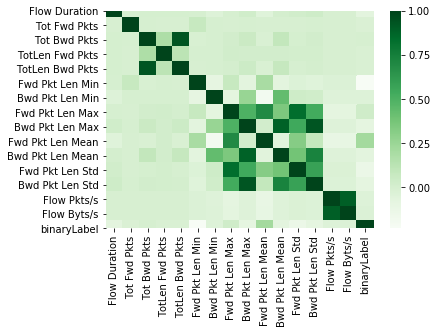

In [21]:
sns.heatmap(data.drop(axis=1,inplace=False,columns=['benignoLabel','ransomwareLabel']).corr(), cmap="Greens")

#### Separamos los valores que utilizaremos para los datos de entradas (Todas las columnas menos el label binario) y los datos de salida (los label asociados)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
dataX = data.drop(['binaryLabel','benignoLabel','ransomwareLabel'], axis = 1).copy()

In [25]:
dataY = data[['binaryLabel','benignoLabel','ransomwareLabel']].copy()

In [26]:
dataX.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s
0,13,0,2,0,135,-1,52.0,-1,83,0.0,67.5,0.0,21.897488,153846.1538,1.040000e+07
1,15,0,2,0,135,-1,52.0,-1,83,0.0,67.5,0.0,21.897488,133333.3333,9.000000e+06
2,14,0,2,0,111,-1,40.0,-1,71,0.0,55.5,0.0,21.897488,142857.1429,7.928571e+06
3,0,0,1,0,83,-1,83.0,-1,83,0.0,83.0,0.0,0.000000,0.0000,0.000000e+00
4,13,0,2,0,159,-1,52.0,-1,107,0.0,79.5,0.0,38.878014,153846.1538,1.220000e+07


In [27]:
dataX.shape

(212795, 15)

In [28]:
dataY.head()

,binaryLabel,benignoLabel,ransomwareLabel
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [29]:
dataY.shape

(212795, 3)

#### GENERAMOS LOS DATOS DE ENTRENAMIENTO,TESTING Y VALIDACIÓN


#### Establecemos que las proporciones serán:
###### - ENTRENAMIENTO =  70%
###### - TESTING = 20%
###### - VALIDACION  = 10% 

In [30]:
train_ratio = 0.7
test_ratio = 0.2
validation_ratio = 0.1

In [31]:
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=test_ratio, random_state=101)

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_ratio/(validation_ratio + train_ratio), random_state=101)

In [33]:
X_train.shape 

(148956, 15)

In [34]:
X_train.shape[0]/dataX.shape[0]

0.6999976503207312

In [35]:
X_test.shape

(42559, 15)

In [36]:
y_test.shape

(42559, 3)

In [37]:
X_test.shape[0]/dataX.shape[0]

0.2

In [38]:
X_val.shape

(21280, 15)

In [39]:
y_val.shape

(21280, 3)

In [40]:
X_val.shape[0]/dataX.shape[0]

0.10000234967926878

##### Comenzamos con el modelos

### CNN - SHU

In [41]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Modelo Secuencial CNN

In [78]:
model = models.Sequential()

In [79]:
model.add(layers.Conv1D(filters=15, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(filters=30, kernel_size=3, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())

In [80]:
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [81]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_30 (Conv1D)           (None, 13, 15)            60        
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 6, 15)             0         
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 4, 30)             1380      
_________________________________________________________________
dropout_11 (Dropout)         (None, 4, 30)             0         
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 2, 30)             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 60)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)              

#### Debido a necesidades del modelo, lo valores de entrada para entrenamiento, testing y validación tienen que ser del tipo 3 dimensional, por tal razón transformarmos esa matriz a una matriz trimensional generica

In [69]:
X_train_3D = X_train.values.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_3D = X_test.values.reshape(X_test.shape[0],X_test.shape[1],1)
X_val_3D = X_val.values.reshape(X_val.shape[0],X_val.shape[1],1)

#### Aqui separamos el modelo en base al tipo de función de perdida a utilizar:

 -BINARIO: DEBE RECIBIR COMO LABEL UN ARRAY2D -> [0 , 1]
 
 -SPARSECATEGORICALCROSSENTROPY: RECIBE COMO LABEL UN VECTOR COLUMNA [0]

In [70]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [71]:
history = model.fit(X_train_3D, y_train['binaryLabel'], epochs=10, validation_data=(X_val_3D, y_val['binaryLabel']))

Train on 148956 samples, validate on 21280 samples
Epoch 1/10
148956/148956 - 11s - loss: 0.6036 - accuracy: 0.7096 - val_loss: 0.5513 - val_accuracy: 0.7619
Epoch 2/10
148956/148956 - 10s - loss: 0.5639 - accuracy: 0.7494 - val_loss: 0.5583 - val_accuracy: 0.7550
Epoch 3/10
148956/148956 - 10s - loss: 0.5567 - accuracy: 0.7565 - val_loss: 0.5490 - val_accuracy: 0.7642
Epoch 4/10
148956/148956 - 10s - loss: 0.5505 - accuracy: 0.7627 - val_loss: 0.5538 - val_accuracy: 0.7594
Epoch 5/10
148956/148956 - 10s - loss: 0.5500 - accuracy: 0.7633 - val_loss: 0.5395 - val_accuracy: 0.7738
Epoch 6/10
148956/148956 - 10s - loss: 0.5240 - accuracy: 0.7892 - val_loss: 0.5041 - val_accuracy: 0.8092
Epoch 7/10
148956/148956 - 10s - loss: 0.5104 - accuracy: 0.8029 - val_loss: 0.5201 - val_accuracy: 0.7932
Epoch 8/10
148956/148956 - 10s - loss: 0.4837 - accuracy: 0.8295 - val_loss: 0.4434 - val_accuracy: 0.8699
Epoch 9/10
148956/148956 - 10s - loss: 0.4810 - accuracy: 0.8322 - val_loss: 0.4925 - val_acc

In [82]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [83]:
history = model.fit(X_train_3D, y_train[['benignoLabel','ransomwareLabel']], epochs=10, validation_data=(X_val_3D, y_val[['benignoLabel','ransomwareLabel']]))

Train on 148956 samples, validate on 21280 samples
Epoch 1/10
148956/148956 [==============================] - 12s 84us/sample - loss: 0.6804 - accuracy: 0.6457 - val_loss: 0.6796 - val_accuracy: 0.6473
Epoch 2/10
148956/148956 [==============================] - 11s 74us/sample - loss: 0.6791 - accuracy: 0.6481 - val_loss: 0.6796 - val_accuracy: 0.6473
Epoch 3/10
148956/148956 [==============================] - 11s 75us/sample - loss: 0.6792 - accuracy: 0.6481 - val_loss: 0.6796 - val_accuracy: 0.6473
Epoch 4/10
148956/148956 [==============================] - 11s 75us/sample - loss: 0.6792 - accuracy: 0.6481 - val_loss: 0.6796 - val_accuracy: 0.6473
Epoch 5/10
148956/148956 [==============================] - 11s 75us/sample - loss: 0.6791 - accuracy: 0.6481 - val_loss: 0.6796 - val_accuracy: 0.6473
Epoch 6/10
148956/148956 [==============================] - 11s 75us/sample - loss: 0.6791 - accuracy: 0.6481 - val_loss: 0.6796 - val_accuracy: 0.6473
Epoch 7/10
148956/148956 [===========

### GUARDAR MODELO

In [85]:
import os
name_model_ccn_data1 = 'modelo_cnn_dataset1'
path_model = 'modelos_entrenados'
if not os.path.exists(path_model):
    os.mkdir(path_model)
model.save( '.\\'+  path_model + '\\' + name_model_ccn_data1)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: .\modelos_entrenados\modelo_cnn_dataset1\assets


In [86]:
new_model = tf.keras.models.load_model('./'+ path_model + '/' + name_model_ccn_data1)

In [87]:
test_loss, test_acc = new_model.evaluate(X_test_3D, y_test[['benignoLabel','ransomwareLabel']])

42559/42559 [==============================] - 1s 34us/sample - loss: 0.6790 - accuracy: 0.6483


In [88]:
print("PRECISIÓN",test_acc)
print("LOSS", test_loss)

PRECISIÓN 0.648347
LOSS 0.6790309050423823


In [89]:
predictions = model.predict(X_test_3D)

In [90]:
predictions

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

### ANN
###### observación: Por ahora es una ann generica

##### Recordar la distribución de binaryLabel

0 → Ransomware

1 → Benigno

In [94]:
modelANN = tf.keras.models.Sequential()

In [95]:
modelANN.add(tf.keras.layers.Dense(units = 15, activation = 'relu', input_shape = (X_train.shape[1],)))
modelANN.add(tf.keras.layers.Dropout(0.2))
modelANN.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))
modelANN.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
modelANN.add(tf.keras.layers.Dropout(0.2))
modelANN.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))
modelANN.add(tf.keras.layers.Dense(units = 16, activation = 'relu'))
modelANN.add(tf.keras.layers.Dropout(0.2))
modelANN.add(tf.keras.layers.Dense(units = 8, activation = 'relu'))
modelANN.add(tf.keras.layers.Dense(units = 2, activation = 'softmax'))

In [96]:
modelANN.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])

In [97]:
modelANN.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 15)                240       
_________________________________________________________________
dropout_12 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 30)                480       
_________________________________________________________________
dense_15 (Dense)             (None, 64)                1984      
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_17 (Dense)             (None, 16)              

In [98]:
historyANN = modelANN.fit(X_train, y_train['binaryLabel'], epochs =10,validation_data=(X_val, y_val['binaryLabel']))

Train on 148956 samples, validate on 21280 samples
Epoch 1/10
148956/148956 [==============================] - 8s 53us/sample - loss: 12379.3936 - sparse_categorical_accuracy: 0.6338 - val_loss: 0.6491 - val_sparse_categorical_accuracy: 0.6473
Epoch 2/10
148956/148956 [==============================] - 7s 49us/sample - loss: 188.8674 - sparse_categorical_accuracy: 0.6463 - val_loss: 0.6492 - val_sparse_categorical_accuracy: 0.6473
Epoch 3/10
148956/148956 [==============================] - 8s 51us/sample - loss: 17.6174 - sparse_categorical_accuracy: 0.6476 - val_loss: 0.6491 - val_sparse_categorical_accuracy: 0.6473
Epoch 4/10
148956/148956 [==============================] - 7s 47us/sample - loss: 3.0272 - sparse_categorical_accuracy: 0.6479 - val_loss: 0.6491 - val_sparse_categorical_accuracy: 0.6473
Epoch 5/10
148956/148956 [==============================] - 8s 53us/sample - loss: 0.6482 - sparse_categorical_accuracy: 0.6481 - val_loss: 0.6492 - val_sparse_categorical_accuracy: 0.64

In [99]:
test_lossANN, test_accuracyANN = modelANN.evaluate(X_test, y_test['binaryLabel'])

42559/42559 [==============================] - 1s 20us/sample - loss: 0.5326 - sparse_categorical_accuracy: 0.6483


In [100]:
predictionsANN = modelANN.predict(X_test)

In [101]:
predictionsANN

array([[0.00118134, 0.9988187 ],
       [0.00118134, 0.9988187 ],
       [0.45664802, 0.54335207],
       ...,
       [0.45664802, 0.54335207],
       [0.45664802, 0.54335207],
       [0.45664802, 0.54335207]], dtype=float32)

### PROCESO PARA IGUAL CANTIDAD DE CLASES (BENIGNO - RANSOMWARE)

In [6]:
data2 = pd.read_csv("Dataset_benigno_ransomware/Dataset01.csv")

In [7]:
data2

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s,Label
0,13,0,2,0,135,-1,52.0,-1,83,0.0,67.5,0.000000,21.897488,153846.153800,1.040000e+07,Benigno
1,15,0,2,0,135,-1,52.0,-1,83,0.0,67.5,0.000000,21.897488,133333.333300,9.000000e+06,Benigno
2,14,0,2,0,111,-1,40.0,-1,71,0.0,55.5,0.000000,21.897488,142857.142900,7.928571e+06,Benigno
3,0,0,1,0,83,-1,83.0,-1,83,0.0,83.0,0.000000,0.000000,0.000000,0.000000e+00,Benigno
4,13,0,2,0,159,-1,52.0,-1,107,0.0,79.5,0.000000,38.878014,153846.153800,1.220000e+07,Benigno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212790,6935,55118503,51,55,8844,12692,52.0,52,52,52.0,52.0,0.000000,0.000000,3944.773176,7.218935e+05,Ransomware
212791,4053974,30711742,24,25,2652,12942,52.0,40,-1,40.0,0.0,1.000000,0.000000,0.000000,0.000000e+00,Ransomware
212792,5744,66134134,11,16,1198,16758,52.0,1390,40,1390.0,40.0,0.447214,0.000000,0.000000,0.000000e+00,Ransomware
212793,56624,2439519,12,23,902,21363,52.0,-1,83,0.0,67.5,0.000000,21.897488,8163.265306,5.510204e+05,Benigno


In [14]:
def transform_label(x):
    return 1 if(x == 'Benigno') else 0

In [15]:
data2['binaryLabel']=data2['Label'].apply(transform_label)

In [16]:
def matirx_binary_label(x, name):
    if(x == name):
        return 1
    else:
        return 0

In [17]:
data2['benignoLabel']=data2['Label'].apply(matirx_binary_label, name='Benigno')

In [18]:
data2['ransomwareLabel']=data2['Label'].apply(matirx_binary_label, name='Ransomware')

In [19]:
dataBenigno = data2[data2['Label']=='Benigno']

In [20]:
dataRansomware = data2[data2['Label']!='Benigno']

#### Cantidad Benignos

In [23]:
dataBenigno.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s,Label,binaryLabel,benignoLabel,ransomwareLabel
0,13,0,2,0,135,-1,52.0,-1,83,0.0,67.5,0.0,21.897488,153846.1538,1.040000e+07,Benigno,1,1,0
1,15,0,2,0,135,-1,52.0,-1,83,0.0,67.5,0.0,21.897488,133333.3333,9.000000e+06,Benigno,1,1,0
2,14,0,2,0,111,-1,40.0,-1,71,0.0,55.5,0.0,21.897488,142857.1429,7.928571e+06,Benigno,1,1,0
3,0,0,1,0,83,-1,83.0,-1,83,0.0,83.0,0.0,0.000000,0.0000,0.000000e+00,Benigno,1,1,0
4,13,0,2,0,159,-1,52.0,-1,107,0.0,79.5,0.0,38.878014,153846.1538,1.220000e+07,Benigno,1,1,0


In [21]:
dataBenigno.shape[0]

137907

#### Cantidad Ransomware

In [24]:
dataRansomware.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s,Label,binaryLabel,benignoLabel,ransomwareLabel
9,0,0,1,0,83,-1,83.0,1093,789,314.250000,238.250000,519.180043,367.185580,1.043094,5.424088e+01,Ransomware,0,0,1
18,28119,0,2,0,135,-1,-1.0,52,-1,52.000000,0.000000,1.000000,0.000000,1.534993,4.541661e+02,Ransomware,0,0,1
22,30326757,0,7,0,581,-1,83.0,1390,407,363.285714,123.428571,491.957049,134.871985,200000.000000,8.000000e+06,Ransomware,0,0,1
24,0,0,1,0,83,-1,-1.0,40,-1,40.000000,0.000000,1.000000,0.000000,0.122068,2.915903e+01,Ransomware,0,0,1
42,0,0,1,0,83,-1,-1.0,52,-1,52.000000,0.000000,1.000000,0.000000,0.001591,8.275361e-02,Ransomware,0,0,1


In [22]:
dataRansomware.shape[0]

74888

#### GENERAMOS NUEVOS CSV

In [37]:
dataBenigno.to_csv(r'Data_Beningo.csv', index = False)
dataRansomware.to_csv(r'Data_Ransomware.csv', index = False)

##### Nuevos PATH a utilizar

In [2]:
path_dataset_benigno = "Data_Beningo.csv"
path_dataset_ransomware = "Data_Ransomware.csv"

In [3]:
dataBeningoCSV = pd.read_csv("Data_Beningo.csv")
dataRansomwareCSV = pd.read_csv("Data_Ransomware.csv")

In [4]:
cantidadBenigno =dataBeningoCSV.shape[0]

In [104]:
cantidadBenigno

137907

In [5]:
cantidadRansomware = dataRansomwareCSV.shape[0]


In [105]:
cantidadRansomware

74888

In [6]:
cantidadFinal = cantidadRansomware if(cantidadBenigno > cantidadRansomware) else cantidadBenigno

In [7]:
dataBenignoBalanced = dataBeningoCSV.head(cantidadFinal)

In [8]:
dataRansomwareBalanced = dataRansomwareCSV.head(cantidadFinal)

In [9]:
data_unite_balanced = pd.concat([dataRansomwareBalanced, dataBenignoBalanced], axis=0)

#### Data ya balanceada

In [10]:
data_unite_balanced

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s,Label,binaryLabel,benignoLabel,ransomwareLabel
0,0,0,1,0,83,-1,83.0,1093,789,314.250000,238.250000,519.180043,367.185580,1.043094,5.424088e+01,Ransomware,0,0,1
1,28119,0,2,0,135,-1,-1.0,52,-1,52.000000,0.000000,1.000000,0.000000,1.534993,4.541661e+02,Ransomware,0,0,1
2,30326757,0,7,0,581,-1,83.0,1390,407,363.285714,123.428571,491.957049,134.871985,200000.000000,8.000000e+06,Ransomware,0,0,1
3,0,0,1,0,83,-1,-1.0,40,-1,40.000000,0.000000,1.000000,0.000000,0.122068,2.915903e+01,Ransomware,0,0,1
4,0,0,1,0,83,-1,-1.0,52,-1,52.000000,0.000000,1.000000,0.000000,0.001591,8.275361e-02,Ransomware,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74883,208115,1,1,64,416,64,416.0,64,416,64.000000,416.000000,0.000000,0.000000,9.610071,2.306417e+03,Benigno,1,1,0
74884,737865,1,2,64,116,64,52.0,64,64,64.000000,58.000000,0.000000,8.426150,4.065784,2.439471e+02,Benigno,1,1,0
74885,1318,1,1,64,242,64,242.0,64,242,64.000000,242.000000,0.000000,0.000000,1517.450683,2.321700e+05,Benigno,1,1,0
74886,23874,1,1,64,182,64,182.0,64,182,64.000000,182.000000,0.000000,0.000000,83.773142,1.030410e+04,Benigno,1,1,0


#### Aleatorizamos las filas

In [11]:
df_shuffled=sklearn.utils.shuffle(data_unite_balanced)

In [12]:
df_shuffled

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s,Label,binaryLabel,benignoLabel,ransomwareLabel
19319,4,2,0,135,0,52,-1.0,83,-1,67.50,0.00,21.897488,0.000000,500000.000000,3.380000e+07,Benigno,1,1,0
51130,33669,1,1,52,52,52,52.0,52,52,52.00,52.00,0.000000,0.000000,59.401824,3.088895e+03,Benigno,1,1,0
24388,48500,2,1,803,482,52,482.0,751,482,401.50,482.00,494.266629,0.000000,61.855670,2.649485e+04,Benigno,1,1,0
56468,55043379,12,6,3000,1278,52,213.0,448,213,250.00,213.00,206.804035,0.447214,0.327015,7.772052e+01,Benigno,1,1,0
34492,0,1,0,52,0,52,-1.0,52,-1,52.00,0.00,0.000000,0.000000,0.000000,0.000000e+00,Benigno,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28756,0,10,3,338,9502,248,-1.0,40,-1,40.00,0.00,0.000000,0.000000,0.151019,2.471046e+01,Ransomware,0,0,1
8276,1062376,4,4,999,395,40,40.0,709,263,249.75,98.75,313.304830,109.644501,7.530291,1.312153e+03,Benigno,1,1,0
72398,24213,1,1,60,439,60,439.0,60,439,60.00,439.00,0.000000,0.000000,82.600256,2.060876e+04,Benigno,1,1,0
51454,0,1,0,52,0,52,-1.0,52,-1,52.00,0.00,0.000000,0.000000,0.000000,0.000000e+00,Benigno,1,1,0


#### Volver a hacer el proceso de separar los valores que utilizaremos para los datos de entradas (Todas las columnas menos el label binario) y los datos de salida (los label asociados)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df_shuffled_X = df_shuffled.drop(['Label','binaryLabel','benignoLabel','ransomwareLabel'], axis = 1).copy()

In [15]:
df_shuffled_Y = df_shuffled[['binaryLabel','benignoLabel','ransomwareLabel']].copy()

In [16]:
df_shuffled_X

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s
19319,4,2,0,135,0,52,-1.0,83,-1,67.50,0.00,21.897488,0.000000,500000.000000,3.380000e+07
51130,33669,1,1,52,52,52,52.0,52,52,52.00,52.00,0.000000,0.000000,59.401824,3.088895e+03
24388,48500,2,1,803,482,52,482.0,751,482,401.50,482.00,494.266629,0.000000,61.855670,2.649485e+04
56468,55043379,12,6,3000,1278,52,213.0,448,213,250.00,213.00,206.804035,0.447214,0.327015,7.772052e+01
34492,0,1,0,52,0,52,-1.0,52,-1,52.00,0.00,0.000000,0.000000,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28756,0,10,3,338,9502,248,-1.0,40,-1,40.00,0.00,0.000000,0.000000,0.151019,2.471046e+01
8276,1062376,4,4,999,395,40,40.0,709,263,249.75,98.75,313.304830,109.644501,7.530291,1.312153e+03
72398,24213,1,1,60,439,60,439.0,60,439,60.00,439.00,0.000000,0.000000,82.600256,2.060876e+04
51454,0,1,0,52,0,52,-1.0,52,-1,52.00,0.00,0.000000,0.000000,0.000000,0.000000e+00


In [17]:
df_shuffled_Y

,binaryLabel,benignoLabel,ransomwareLabel
19319,1,1,0
51130,1,1,0
24388,1,1,0
56468,1,1,0
34492,1,1,0
...,...,...,...
28756,0,0,1
8276,1,1,0
72398,1,1,0
51454,1,1,0


#### Establecemos que las proporciones serán:
###### - ENTRENAMIENTO =  70%
###### - TESTING = 20%
###### - VALIDACION  = 10% 

In [18]:
train_ratio = 0.8
test_ratio = 0.1
validation_ratio = 0.1

In [19]:
X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(df_shuffled_X, df_shuffled_Y, test_size=test_ratio, random_state=101)

In [20]:
X_train_shuffled, X_val_shuffled, y_train_shuffled, y_val_shuffled = train_test_split(X_train_shuffled, y_train_shuffled, test_size=validation_ratio/(validation_ratio + train_ratio), random_state=101)

### CNN - 1D - SHUFFLED

In [21]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Modelo Secuencial CNN

In [82]:
model_shuffled = models.Sequential()

In [83]:
model_shuffled.add(layers.Conv1D(filters=15, kernel_size=3, activation='relu', input_shape=(X_train_shuffled.shape[1],1)))
model_shuffled.add(layers.MaxPooling1D(pool_size=2))
model_shuffled.add(layers.Conv1D(filters=30, kernel_size=3, activation='relu'))
model_shuffled.add(layers.MaxPooling1D(pool_size=1))
model_shuffled.add(layers.Conv1D(filters=60, kernel_size=3, activation='relu'))
model_shuffled.add(tf.keras.layers.Dropout(0.2))
model_shuffled.add(layers.MaxPooling1D(pool_size=1))
model_shuffled.add(layers.Flatten())

In [84]:
model_shuffled.add(layers.Dense(32, activation='relu'))
model_shuffled.add(tf.keras.layers.Dropout(0.2))
model_shuffled.add(layers.Dense(10, activation='relu'))
model_shuffled.add(layers.Dense(2, activation='softmax'))

In [85]:
model_shuffled.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_44 (Conv1D)           (None, 13, 15)            60        
_________________________________________________________________
max_pooling1d_33 (MaxPooling (None, 6, 15)             0         
_________________________________________________________________
conv1d_45 (Conv1D)           (None, 4, 30)             1380      
_________________________________________________________________
max_pooling1d_34 (MaxPooling (None, 4, 30)             0         
_________________________________________________________________
conv1d_46 (Conv1D)           (None, 2, 60)             5460      
_________________________________________________________________
dropout_12 (Dropout)         (None, 2, 60)             0         
_________________________________________________________________
max_pooling1d_35 (MaxPooling (None, 2, 60)           

#### Debido a necesidades del modelo, lo valores de entrada para entrenamiento, testing y validación tienen que ser del tipo 3 dimensional, por tal razón transformarmos esa matriz a una matriz trimensional generica

In [86]:
X_train_3D_shuffled = X_train_shuffled.values.reshape(X_train_shuffled.shape[0],X_train_shuffled.shape[1],1)
X_test_3D_shuffled = X_test_shuffled.values.reshape(X_test_shuffled.shape[0],X_test_shuffled.shape[1],1)
X_val_3D_shuffled = X_val_shuffled.values.reshape(X_val_shuffled.shape[0],X_val_shuffled.shape[1],1)

In [87]:
model_shuffled.summary()  

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_44 (Conv1D)           (None, 13, 15)            60        
_________________________________________________________________
max_pooling1d_33 (MaxPooling (None, 6, 15)             0         
_________________________________________________________________
conv1d_45 (Conv1D)           (None, 4, 30)             1380      
_________________________________________________________________
max_pooling1d_34 (MaxPooling (None, 4, 30)             0         
_________________________________________________________________
conv1d_46 (Conv1D)           (None, 2, 60)             5460      
_________________________________________________________________
dropout_12 (Dropout)         (None, 2, 60)             0         
_________________________________________________________________
max_pooling1d_35 (MaxPooling (None, 2, 60)           

In [88]:
model_shuffled.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy','accuracy'])

In [89]:
history_shuffled = model_shuffled.fit(X_train_3D_shuffled, y_train_shuffled['binaryLabel'], epochs=10, validation_data=(X_val_3D_shuffled, y_val_shuffled['binaryLabel']),shuffle=True)

Train on 119820 samples, validate on 14978 samples
Epoch 1/10
119820/119820 [==============================] - 19s 160us/sample - loss: 0.6785 - sparse_categorical_accuracy: 0.6347 - accuracy: 0.6347 - val_loss: 0.6924 - val_sparse_categorical_accuracy: 0.6209 - val_accuracy: 0.6209
Epoch 2/10
119820/119820 [==============================] - 20s 163us/sample - loss: 0.6941 - sparse_categorical_accuracy: 0.6192 - accuracy: 0.6192 - val_loss: 0.6801 - val_sparse_categorical_accuracy: 0.6332 - val_accuracy: 0.6332
Epoch 3/10
119820/119820 [==============================] - 19s 157us/sample - loss: 0.6256 - sparse_categorical_accuracy: 0.6877 - accuracy: 0.6877 - val_loss: 0.6148 - val_sparse_categorical_accuracy: 0.6985 - val_accuracy: 0.6985
Epoch 4/10
119820/119820 [==============================] - 19s 159us/sample - loss: 0.6481 - sparse_categorical_accuracy: 0.6652 - accuracy: 0.6652 - val_loss: 0.6230 - val_sparse_categorical_accuracy: 0.6903 - val_accuracy: 0.6903
Epoch 5/10
119820

In [91]:
test_loss_shuffled, test_acc_shuffled = model_shuffled.evaluate(X_test_3D_shuffled, y_test_shuffled['binaryLabel'])

14978/14978 [==============================] - 1s 45us/sample - loss: 0.5776 - sparse_categorical_accuracy: 0.7356 - accuracy: 0.7356


ValueError: too many values to unpack (expected 2)

In [70]:
model_shuffled.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [71]:
history_shuffled = model_shuffled.fit(X_train_3D_shuffled, y_train_shuffled[['benignoLabel','ransomwareLabel']], epochs=10, validation_data=(X_val_3D_shuffled, y_val_shuffled[['benignoLabel','ransomwareLabel']]))

Train on 119820 samples, validate on 14978 samples
Epoch 1/10
119820/119820 [==============================] - 20s 166us/sample - loss: 0.6696 - accuracy: 0.6673 - val_loss: 0.6773 - val_accuracy: 0.6518
Epoch 2/10
119820/119820 [==============================] - 19s 157us/sample - loss: 0.6593 - accuracy: 0.6878 - val_loss: 0.6567 - val_accuracy: 0.6930
Epoch 3/10
119820/119820 [==============================] - 19s 159us/sample - loss: 0.6560 - accuracy: 0.6945 - val_loss: 0.6537 - val_accuracy: 0.6991
Epoch 4/10
119820/119820 [==============================] - 19s 155us/sample - loss: 0.6590 - accuracy: 0.6884 - val_loss: 0.6609 - val_accuracy: 0.6847
Epoch 5/10
119820/119820 [==============================] - 18s 150us/sample - loss: 0.6532 - accuracy: 0.7000 - val_loss: 0.6500 - val_accuracy: 0.7064
Epoch 6/10
119820/119820 [==============================] - 19s 155us/sample - loss: 0.6506 - accuracy: 0.7053 - val_loss: 0.6501 - val_accuracy: 0.7062
Epoch 7/10
119820/119820 [=====

In [72]:
test_loss_shuffled, test_acc_shuffled = model_shuffled.evaluate(X_test_3D_shuffled, y_test_shuffled[['benignoLabel','ransomwareLabel']])

14978/14978 [==============================] - 1s 42us/sample - loss: 0.6390 - accuracy: 0.7285


In [92]:
print("PRECISIÓN",test_acc_shuffled)
print("LOSS", test_loss_shuffled)

PRECISIÓN 0.7284684
LOSS 0.6389699422369208


In [93]:
predictions_shuffled = model_shuffled.predict(X_test_3D_shuffled)

In [94]:
predictions_shuffled

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [95]:
scnn_predicted = np.argmax(predictions_shuffled, axis=1)

In [96]:
scnn_predicted

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [79]:
from sklearn.metrics import confusion_matrix, classification_report  

In [98]:
scnn_report = classification_report(y_test_shuffled['binaryLabel'], scnn_predicted)  
print(scnn_report)

              precision    recall  f1-score   support

           0       0.90      0.53      0.66      7423
           1       0.67      0.94      0.78      7555

    accuracy                           0.74     14978
   macro avg       0.78      0.73      0.72     14978
weighted avg       0.78      0.74      0.72     14978



In [102]:
#Creamos la matriz de confusión
scnn_cm = confusion_matrix(y_test_shuffled['binaryLabel'], scnn_predicted)

In [103]:
scnn_cm

array([[3904, 3519],
       [ 441, 7114]], dtype=int64)

### ANN

In [116]:
modelANN_shuffled = tf.keras.models.Sequential()

In [117]:
modelANN_shuffled.add(tf.keras.layers.Dense(units = 15, activation = 'relu', input_shape = (X_train_shuffled.shape[1],)))
modelANN_shuffled.add(tf.keras.layers.Dropout(0.2))
modelANN_shuffled.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))
modelANN_shuffled.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
modelANN_shuffled.add(tf.keras.layers.Dropout(0.2))
modelANN_shuffled.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))
modelANN_shuffled.add(tf.keras.layers.Dense(units = 16, activation = 'relu'))
modelANN_shuffled.add(tf.keras.layers.Dropout(0.2))
modelANN_shuffled.add(tf.keras.layers.Dense(units = 8, activation = 'relu'))
modelANN_shuffled.add(tf.keras.layers.Dense(units = 2, activation = 'softmax'))

In [118]:
modelANN_shuffled.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 15)                240       
_________________________________________________________________
dropout_6 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 30)                480       
_________________________________________________________________
dense_18 (Dense)             (None, 64)                1984      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_20 (Dense)             (None, 16)               

In [110]:
modelANN_shuffled.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])

In [112]:
historyANN_shuffled = modelANN_shuffled.fit(X_train_shuffled, y_train_shuffled['binaryLabel'], epochs =10,validation_data=(X_val_shuffled, y_val_shuffled['binaryLabel']))

Train on 104842 samples, validate on 14978 samples
Epoch 1/10
104842/104842 [==============================] - 6s 58us/sample - loss: 7290.2656 - sparse_categorical_accuracy: 0.5013 - val_loss: 0.6931 - val_sparse_categorical_accuracy: 0.4996
Epoch 2/10
104842/104842 [==============================] - 5s 50us/sample - loss: 21.3083 - sparse_categorical_accuracy: 0.5002 - val_loss: 0.6932 - val_sparse_categorical_accuracy: 0.4996
Epoch 3/10
104842/104842 [==============================] - 5s 50us/sample - loss: 4.9463 - sparse_categorical_accuracy: 0.5002 - val_loss: 0.6933 - val_sparse_categorical_accuracy: 0.5004
Epoch 4/10
104842/104842 [==============================] - 5s 49us/sample - loss: 5.4013 - sparse_categorical_accuracy: 0.5008 - val_loss: 0.6933 - val_sparse_categorical_accuracy: 0.5004
Epoch 5/10
104842/104842 [==============================] - 5s 51us/sample - loss: 2.6536 - sparse_categorical_accuracy: 0.5025 - val_loss: 0.6931 - val_sparse_categorical_accuracy: 0.4996


In [119]:
modelANN_shuffled.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [124]:
historyANN_shuffled = modelANN_shuffled.fit(X_train_shuffled, y_train_shuffled[['benignoLabel','ransomwareLabel']], epochs =10,validation_data=(X_val_shuffled, y_val_shuffled[['benignoLabel','ransomwareLabel']]))

Train on 104842 samples, validate on 14978 samples
Epoch 1/10
104842/104842 [==============================] - 6s 60us/sample - loss: 6.8535 - accuracy: 0.5454 - val_loss: 6.8306 - val_accuracy: 0.5504
Epoch 2/10
104842/104842 [==============================] - 6s 53us/sample - loss: 5.2604 - accuracy: 0.5695 - val_loss: 0.6064 - val_accuracy: 0.6126
Epoch 3/10
104842/104842 [==============================] - 6s 56us/sample - loss: 2.9481 - accuracy: 0.5952 - val_loss: 0.6063 - val_accuracy: 0.6144
Epoch 4/10
104842/104842 [==============================] - 6s 56us/sample - loss: 2.8229 - accuracy: 0.6019 - val_loss: 0.6054 - val_accuracy: 0.6121
Epoch 5/10
104842/104842 [==============================] - 7s 62us/sample - loss: 1.8006 - accuracy: 0.6181 - val_loss: 0.5975 - val_accuracy: 0.6350
Epoch 6/10
104842/104842 [==============================] - 6s 56us/sample - loss: 1.2756 - accuracy: 0.6184 - val_loss: 0.5933 - val_accuracy: 0.6379
Epoch 7/10
104842/104842 [=================

In [113]:
test_lossANN_shuffled, test_accuracyANN_shuffled = modelANN_shuffled.evaluate(X_test_shuffled, y_test_shuffled['binaryLabel'])

29956/29956 [==============================] - 1s 17us/sample - loss: 0.6931 - sparse_categorical_accuracy: 0.5013


In [114]:
predictionsANN_shuffled = modelANN_shuffled.predict(X_test_shuffled)

In [115]:
predictionsANN_shuffled

array([[0.49843195, 0.501568  ],
       [0.49843195, 0.501568  ],
       [0.49843195, 0.501568  ],
       ...,
       [0.49843195, 0.501568  ],
       [0.49843195, 0.501568  ],
       [0.49843195, 0.501568  ]], dtype=float32)

In [ ]:
### mejorar modelos en base a las dimensiones de los mismos